In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_excel('/content/iris (1).xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.shape

(150, 5)

In [7]:
data.isnull().sum()

,0
SL,7
SW,6
PL,6
PW,0
Classification,0


In [8]:
# Missing values percentage
data.isnull().sum()/data.shape[0]*100

,0
SL,4.666667
SW,4.000000
PL,4.000000
PW,0.000000
Classification,0.000000


In [9]:
data.duplicated().sum()

3

In [10]:
for i in data.select_dtypes(include='object'):

  print(data[i].value_counts())

Classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SL,143.0,5.855944,0.828168,4.3,5.1,5.80,6.4,7.9
SW,144.0,3.049306,0.430644,2.0,2.8,3.00,3.3,4.4
PL,144.0,3.756250,1.761306,1.0,1.6,4.35,5.1,6.9
PW,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [12]:
data.describe(include='object')

,Classification
count,150
unique,3
top,Iris-setosa
freq,50


In [13]:
print(data.nunique())

SL                35
SW                23
PL                43
PW                22
Classification     3
dtype: int64


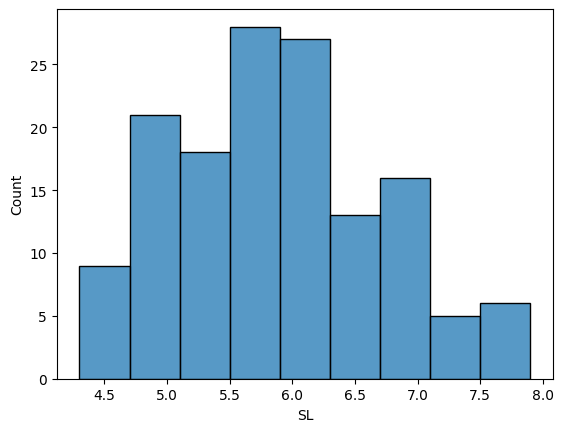

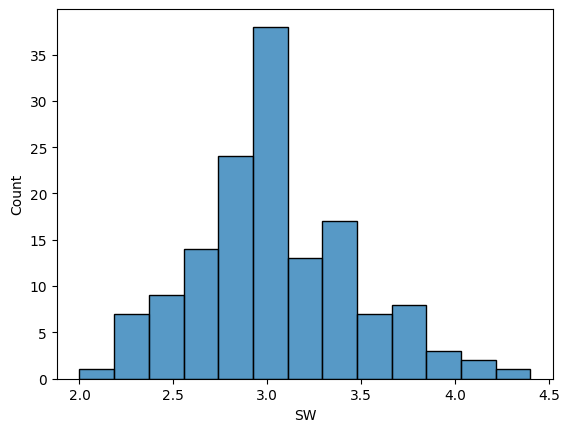

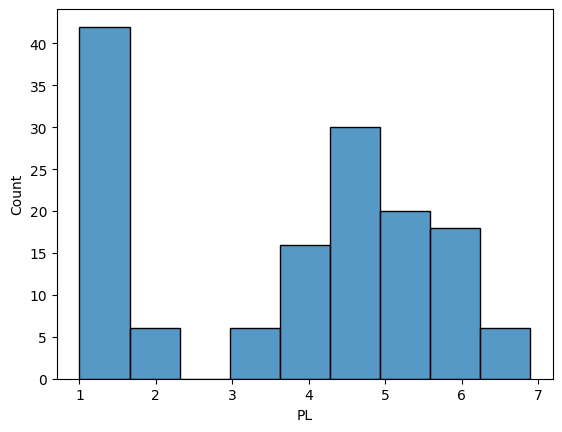

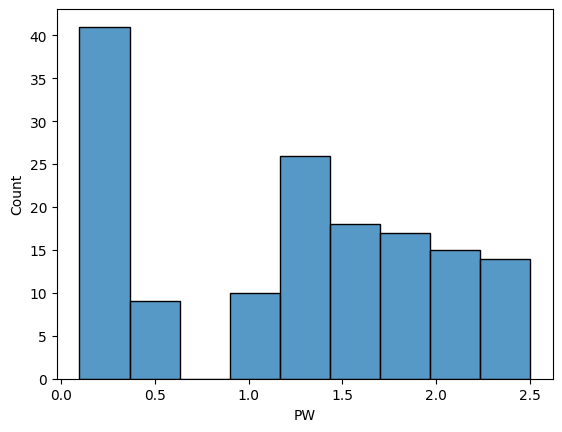

In [14]:
for i in data.select_dtypes(include ='number').columns:
  sns.histplot(data[i])
  plt.show()

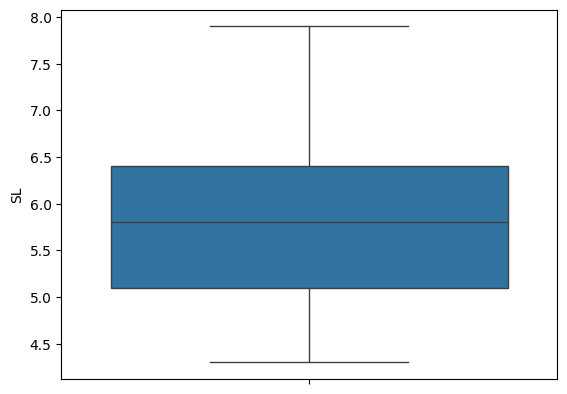

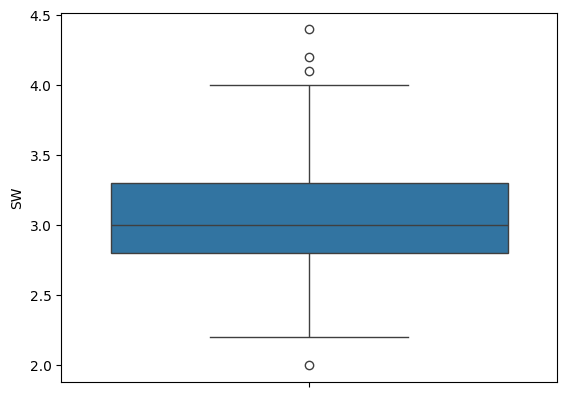

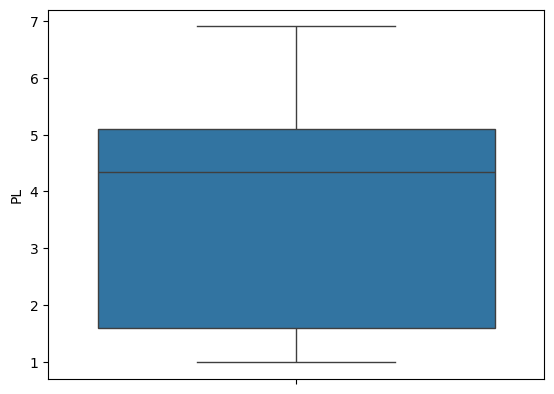

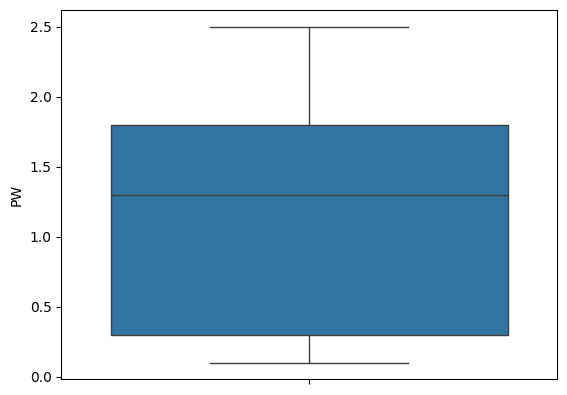

In [15]:
# to find outliers
for i in data.select_dtypes(include ='number').columns:
  sns.boxplot(data[i])
  plt.show()

In [17]:
# Handle missing values by filling numeric columns with their mean
numeric_columns = data.select_dtypes(include='number').columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

In [19]:
data.head(10)

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa
5,5.400000,3.9,1.7,0.4,Iris-setosa
6,4.600000,3.4,1.4,0.3,Iris-setosa
7,5.000000,3.4,1.5,0.2,Iris-setosa
8,4.400000,2.9,1.4,0.2,Iris-setosa
9,4.900000,3.1,1.5,0.1,Iris-setosa


In [22]:
# Encode the target variable (Classification)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])

In [23]:
# Split features and target variable
X = data.drop('Classification', axis=1)
y = data['Classification']

In [24]:
# Split into training (80%) and testing (20%) sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 1.0


In [27]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")


SVM Accuracy: 1.0000


In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.4f}")


KNN Accuracy: 0.9667


In [29]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")


Decision Tree Accuracy: 1.0000


In [30]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = nb_model.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")

Naive Bayes Accuracy: 1.0000


In [32]:
# Store accuracy results in a dictionary
model_accuracies = {
    "Random Forest": accuracy_rf,
    "Support Vector Machine": accuracy_svm,
    "K-Nearest Neighbors": accuracy_knn,
    "Decision Tree": accuracy_dt,
    "Naive Bayes": accuracy_nb
}

# Print each model's accuracy
print("\nModel Accuracies:")
for model, acc in model_accuracies.items():
    print(f"{model}: {acc:.4f}")

# Best model
best_model = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model]

print(f"\nBest Classification Model: {best_model} with accuracy {best_accuracy:.4f}")



Model Accuracies:
Random Forest: 1.0000
Support Vector Machine: 1.0000
K-Nearest Neighbors: 0.9667
Decision Tree: 1.0000
Naive Bayes: 1.0000

Best Classification Model: Random Forest with accuracy 1.0000
